## Beginner Tutorial

### Key Skills for Data Science

1. **Basic Tools**: Familiarity with a few essential tools like Python, R, or SQL is helpful, but Python is often enough. Focus on mastering Python as it's widely used and versatile.

2. **Basic Statistics**: Understanding foundational concepts like mean, median, and standard deviation will make it easier to analyze data and use Python effectively.

3. **Data Munging**: The ability to clean and format messy or inconsistent data (like handling dates and strings) is crucial. Python offers powerful tools for data cleaning.

4. **Data Visualization**: Visualizing data helps in understanding insights. Libraries like Matplotlib and Seaborn in Python are excellent for creating meaningful visualizations.

5. **Machine Learning**: A deep knowledge of the math behind machine learning isn’t necessary. Focus on understanding the basics and learning how to implement algorithms in Python.

In [10]:
# basic Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# load the datat files



In [11]:
# Load CSV files from the archive folder
combats_df = pd.read_csv('archive/combats.csv')
pokemon_df = pd.read_csv('archive/pokemon.csv')
tests_df = pd.read_csv('archive/tests.csv')

# Display the first few rows of each DataFrame to verify loading
print("Combats Data:")
display(combats_df.head())

print("Pokemon Data:")
display(pokemon_df.head())

print("Tests Data:")
display(tests_df.head())

Combats Data:


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


Pokemon Data:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Tests Data:


,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


Let's see more information on this csv files

In [12]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


There are non-numeric columns in `pokemon_df`, such as names or categorical data, which will prevent the correlation calculation. To fix this, we need to exclude non-numeric columns before calculating the correlation matrix.

In [15]:
# Select only the numeric columns in pokemon_df
numeric_pokemon_df = pokemon_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
correlation_matrix = numeric_pokemon_df.corr()

# Display the correlation matrix
print("Correlation matrix for numeric columns in pokemon_df:")
display(correlation_matrix)

Correlation matrix for numeric columns in pokemon_df:


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


•	`pokemon_df.select_dtypes(include=['float64', 'int64'])` selects only the columns with numeric data types (float64 and int64), excluding any columns with strings or other non-numeric data types.


•	We then calculate the correlation on the filtered DataFrame (numeric_pokemon_df) and display the resulting correlation matrix.

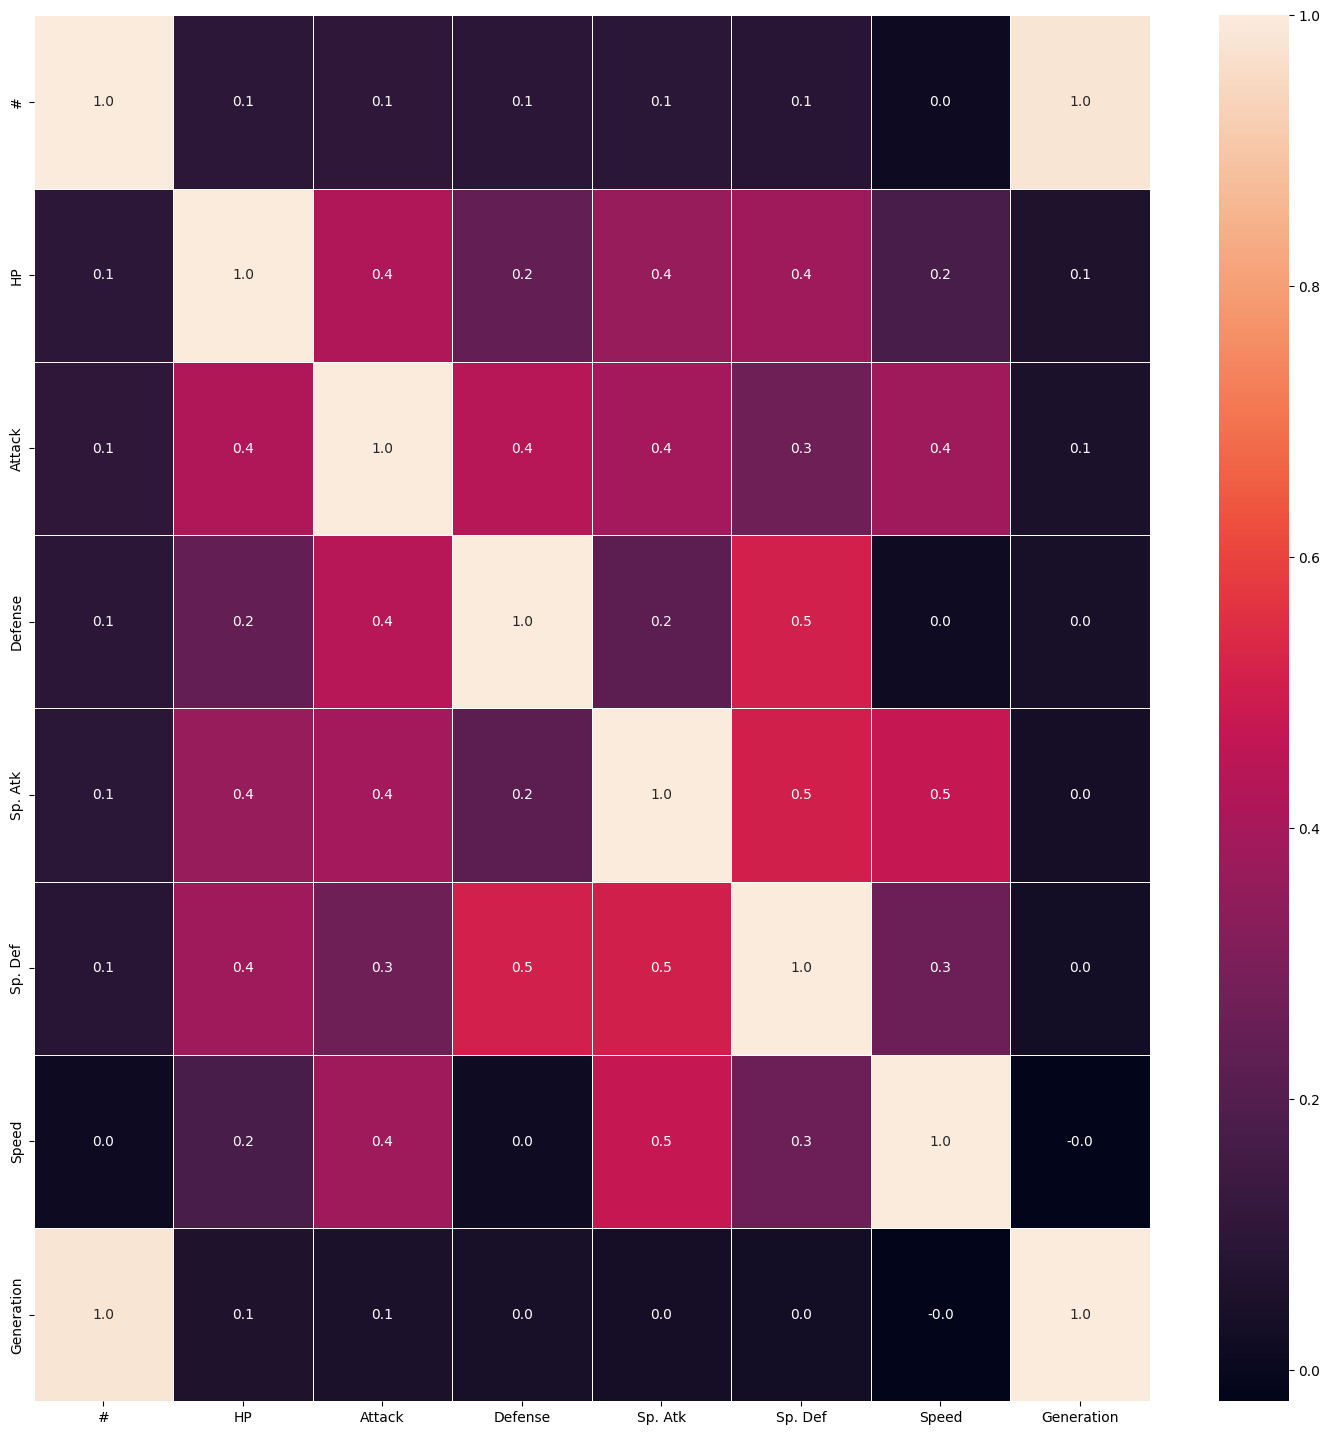

In [16]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [17]:
pokemon_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Matplotlib

It helps us in plotting data, like simple line plot, scatter plot or histograms, it's up to you to decide which plots suits your data most.

#### Line Plot

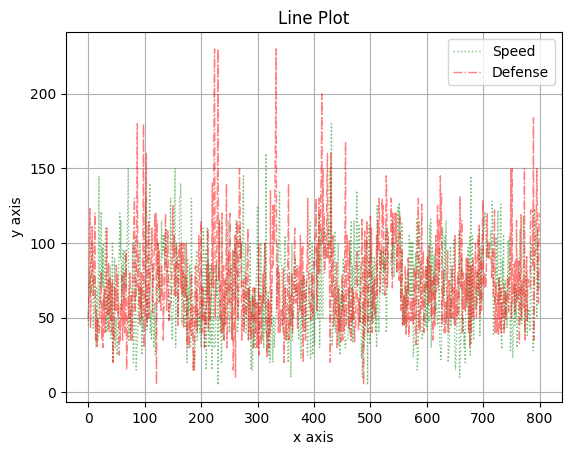

In [18]:
pokemon_df.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
pokemon_df.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

#### Scatter Plot

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

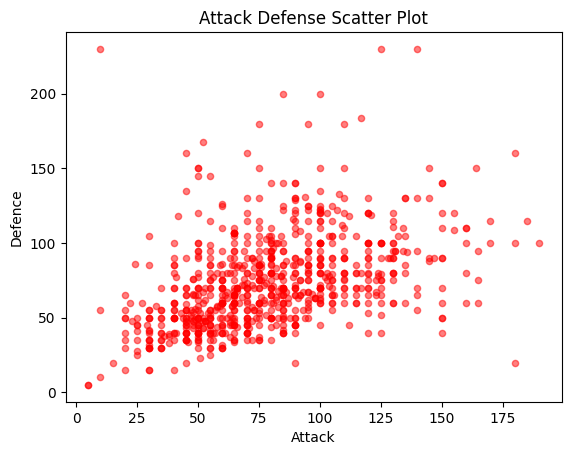

In [19]:
pokemon_df.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

#### Histogram

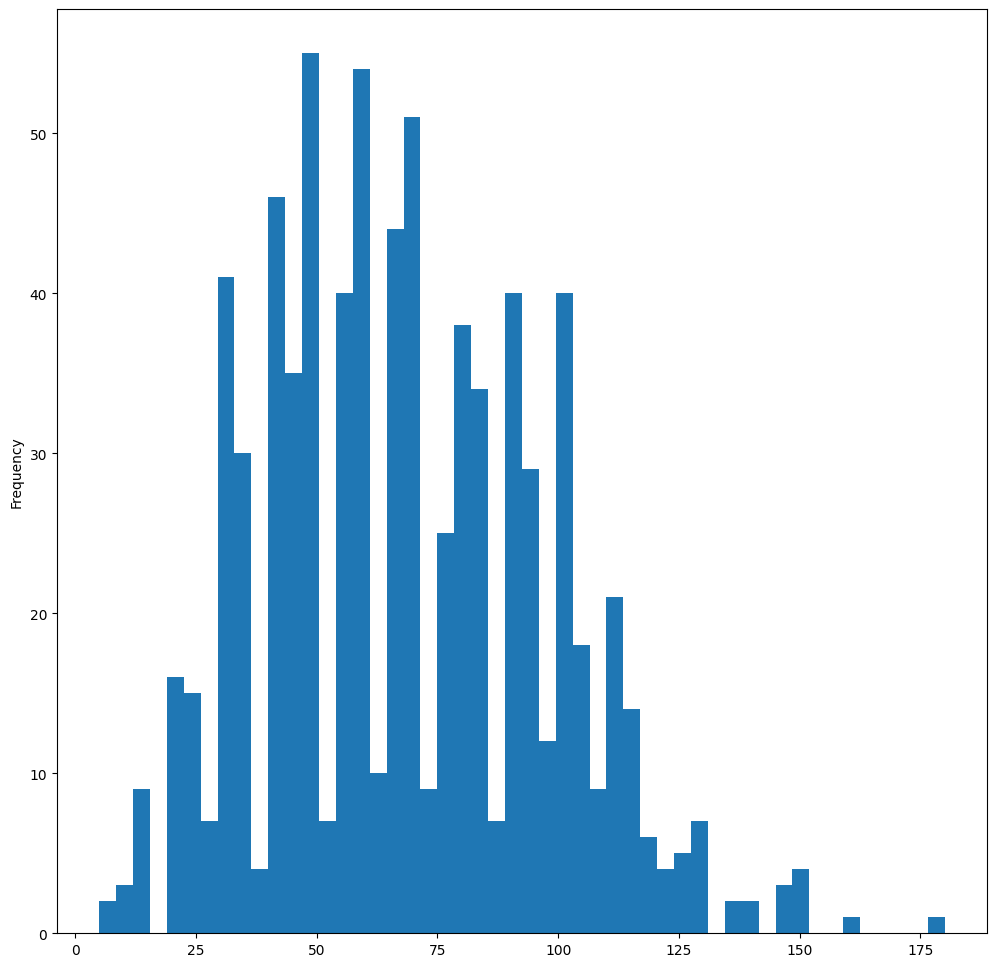

In [20]:
pokemon_df.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

### Dictionary

### Why Do We Need a Dictionary?

- A dictionary stores data in **key-value pairs**.
- It allows **faster data retrieval** than lists when searching by key.
- **Example**:
  ```python
  dictionary = {'spain': 'madrid'}

- Key: 'spain'
- Value: 'madrid'


In [23]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


#### Key Characteristics of Dictionary Keys

1. **Keys Must Be Immutable**:
   - Dictionary keys need to be immutable, meaning they cannot be changed after creation.
   - This is why data types like **strings**, **booleans**, **floats**, **integers**, and **tuples** can be used as keys since they are immutable.
   - **Lists** cannot be used as keys because they are mutable (i.e., they can be changed after creation).

2. **Keys Are Unique**:
   - Each key in a dictionary must be unique. If a dictionary has duplicate keys, the last assigned value to the key will overwrite the previous one.
   - This uniqueness ensures that each key-value pair is distinct and can be accessed individually.

#### Example
Consider a dictionary that maps countries to their capitals:
- If we use `"Spain"` as the key with `"Madrid"` as its value, `"Spain"` must be unique in the dictionary.
- Attempting to add another entry with the key `"Spain"` will overwrite the previous value (`"Madrid"`) with the new value.

By ensuring keys are immutable and unique, dictionaries provide efficient and reliable data retrieval, allowing us to map specific keys to values and quickly access them.

In [25]:
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)

dictionary['france'] = "paris"       # Add new entry
print(dictionary)

del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)

print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict

print(dictionary)

{'spain': 'barcelona'}
{'spain': 'barcelona', 'france': 'paris'}
{'france': 'paris'}
True
{}


### Pandas Library

**Pandas** is a powerful and popular Python library used for data manipulation and analysis. It provides data structures and functions to make data handling more accessible, especially with large datasets. Pandas is particularly useful for tasks such as cleaning, transforming, and analyzing structured data.

#### Key Features:
- **Data Structures**: 
  - **Series**: A one-dimensional labeled array, similar to a list or column in a spreadsheet.
  - **DataFrame**: A two-dimensional labeled data structure, similar to a table in a database or an Excel spreadsheet, where each column can be of a different data type.

- **Data Handling**:
  - Allows easy handling of missing data.
  - Supports powerful indexing and selection of data.
  - Enables merging and joining of different datasets.

- **Data Operations**:
  - Provides built-in functions for aggregating, filtering, and grouping data.
  - Simplifies tasks like data reshaping, pivoting, and applying custom functions.

#### Example Use Cases:
- Analyzing financial data.
- Cleaning and transforming large datasets for machine learning.
- Time-series analysis.

With its intuitive syntax and rich functionality, Pandas is a fundamental tool in data science and analytics.

In [27]:
series = pokemon_df['Defense']        # pandas series
print(type(series))

data_frame = pokemon_df[['Defense']]  # pandas data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Logic, Control Flow, and Filtering

#### Logic
- **Logic** in programming refers to the use of **logical operators** and **conditions** to make decisions within code.
- Common logical operators include:
  - **AND** (`and`): Returns `True` if both conditions are true.
  - **OR** (`or`): Returns `True` if at least one condition is true.
  - **NOT** (`not`): Inverts the truth value.
- Logic helps control the behavior of programs based on different conditions, making it essential for decision-making and building complex workflows.

#### Control Flow
- **Control Flow** determines the order in which statements and functions execute in a program.
- Key control flow structures include:
  - **if-elif-else statements**: Execute code based on specified conditions.
  - **Loops**:
    - **for loops**: Repeat code for each item in a sequence.
    - **while loops**: Repeat code as long as a condition is true.
- Control flow structures allow programs to execute certain blocks of code selectively and repetitively, enhancing flexibility and efficiency.

#### Filtering
- **Filtering** is the process of selecting a subset of data that meets specified criteria.
- In data manipulation, filtering allows us to isolate specific rows or values in a dataset based on conditions.
- Commonly used in libraries like Pandas to quickly extract relevant data, for example, filtering rows in a DataFrame based on values in a specific column.
- Filtering is useful for focusing on relevant information, reducing data size, and preparing datasets for analysis.

Together, logic, control flow, and filtering enable developers to build responsive, efficient, and targeted applications by controlling how data and code execute based on various conditions.

In [28]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


#### Filtering

In [29]:
x = pokemon_df['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
pokemon_df[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


#### Filtering with Logical AND

In [30]:
pokemon_df[np.logical_and(pokemon_df['Defense']>200, pokemon_df['Attack']>100 )]

# pokeons with higher defense than 200 and higher attack than 100, there are only 2 pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [31]:
# & can be used instead
pokemon_df[(pokemon_df['Defense']>200) & (pokemon_df['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### While and For Loops

#### While Loop
- A **while loop** is a control flow statement that repeatedly executes a block of code as long as a specified condition is true.
- The loop checks the condition before each iteration, and if the condition is `True`, the code block runs. Once the condition becomes `False`, the loop stops.
- **Example Use Case**: Repeating a task until a certain threshold is reached, such as prompting a user for input until they provide a valid response.

#### For Loop
- A **for loop** iterates over a sequence (like a list, tuple, or range) and executes a block of code once for each item in the sequence.
- The loop ends after all items in the sequence have been processed.
- **Example Use Case**: Processing each item in a collection, such as calculating the sum of a list of numbers or printing each character in a string.

#### Key Differences
- **While loop**: Used when the number of iterations is unknown, and the loop should run based on a condition.
- **For loop**: Used when you need to iterate over a specific sequence or a fixed number of items.

Both `while` and `for` loops are essential for automating repetitive tasks and allow for efficient and concise code.

In [32]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [34]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in pokemon_df[['Attack']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Attack    49
Name: 0, dtype: int64


### In This Section, You Learned:

- **Importing CSV Files**: How to load data from CSV files for analysis.
- **Plotting Basics**: Creating line plots, scatter plots, and histograms to visualize data.
- **Dictionary Basics**: Key features and usage of dictionaries in Python.
- **Pandas Essentials**: Using core features like filtering, a crucial skill for data science.
- **Looping**: Applying `while` and `for` loops to automate repetitive tasks.

## Python DATA SCIENCE toolbox

### Key Concepts for Understanding Functions

1. **Docstrings**:
   - Docstrings are used to document functions, providing a brief description of what the function does.
   - They are written as a string immediately after the function definition.
   - Example:
     ```python
     def f():
         """This is a docstring that documents the function f."""
     ```

2. **Tuples**:
   - A tuple is a sequence of **immutable** Python objects, meaning the values cannot be modified after creation.
   - Tuples are defined using parentheses, e.g., `tuple = (1, 2, 3)`.
   - You can **unpack** a tuple into individual variables, such as `a, b, c = tuple`, which assigns `1` to `a`, `2` to `b`, and `3` to `c`.

In [35]:
def tuple_ex():
    """ return defined t tuple"""
    t = (1,2,3)
    return t

a,b,c = tuple_ex()
print(a,b,c)

1 2 3


#### Scope

1. **Global Scope**:
   - Variables defined in the main body of a script are in the **global scope**.
   - These variables are accessible throughout the entire script, including within functions (unless overridden).

2. **Local Scope**:
   - Variables defined within a function are in the **local scope**.
   - These variables are only accessible within that specific function and cannot be used outside of it.

3. **Built-in Scope**:
   - Built-in scope includes names that are predefined in Python, such as functions like `print()` and `len()`.
   - These are available globally without needing to be defined by the user.

In [36]:
# before running this code can you guess what will be the result

x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

2
3


What if there is no local scope?

In [37]:
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x
# First local scopesearched, then global scope searched, if two of them cannot be found lastly built in scope searched.

10


How can we learn what is built in scope?

In [38]:
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

### Nested Functions

- A **nested function** is a function defined inside another function.
- Nested functions have access to variables in their own scope as well as the scope of the outer function.

#### LEGB Rule
- **LEGB** stands for the order in which Python searches for variable names:
  1. **Local**: Variables defined within the current function.
  2. **Enclosing**: Variables in the outer (enclosing) function’s scope, if the current function is nested.
  3. **Global**: Variables defined at the top level of the script or module.
  4. **Built-in**: Predefined names in Python, like `print()` and `len()`.

This rule determines which variable is accessed in nested functions when names overlap across scopes.


In [40]:
# what will this print?

def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2

print(square())

25


### Default and Flexible Arguments in Functions

In Python, functions can have **default arguments** and **flexible arguments** (`*args` and `**kwargs`). These allow functions to handle a variety of inputs in a flexible way.

#### Default Arguments
- A **default argument** is a parameter that assumes a default value if no argument is provided by the caller.
- Default arguments are useful for creating functions with optional parameters, allowing you to set default behavior.
  
  **Example**:
  
  def f(a, b=1):
      """Function where b has a default value of 1"""
      return a + b
  
  In this example, if only `a` is provided when calling `f`, `b` will automatically be set to `1`. For instance:
  
  - Calling `f(3)` will return `4` (since `b` defaults to `1`).
  - Calling `f(3, 5)` will return `8` (using `5` as the value for `b` instead of the default `1`).

#### Flexible Arguments (`*args` and `**kwargs`)

Python provides two special ways to pass a variable number of arguments to a function: `*args` and `**kwargs`.

1. **`*args` (Flexible Positional Arguments)**:
   - `*args` allows you to pass a variable number of positional arguments to a function.
   - Inside the function, `*args` is treated as a **tuple** containing all additional arguments provided by the caller.
   - Useful when the exact number of arguments is unknown beforehand.
   
   **Example**:
   ```python
   def f(*args):
       """Function that accepts any number of positional arguments"""
       for arg in args:
           print(arg)
    ```
   
   Here, calling `f(1, 2, 3)` will print each argument on a new line:
   - Output:
     1
     2
     3

2. **`**kwargs` (Flexible Keyword Arguments)**:
   - `**kwargs` allows you to pass a variable number of keyword arguments (i.e., named arguments) to a function.
   - Inside the function, `**kwargs` is treated as a **dictionary** where keys are the argument names, and values are the corresponding values passed by the caller.
   - This is helpful when you want to handle named arguments that were not predefined in the function.

   **Example**:
   ```python
   def f(**kwargs):
       """Function that accepts any number of keyword arguments"""
       for key, value in kwargs.items():
           print(f"{key} = {value}")
    ```
   
   Calling `f(name="Alice", age=25)` will output:
   - Output:
     name = Alice
     age = 25

#### Summary
- **Default Arguments**: Allow functions to have optional parameters with default values.
- **`*args`**: Allows passing a variable number of positional arguments, accessible as a tuple.
- **`**kwargs`**: Allows passing a variable number of keyword arguments, accessible as a dictionary.

Using these features, Python functions can handle a range of input scenarios, from simple fixed arguments to flexible and complex sets of inputs.

#### Default Argument

In [41]:
def f(a,b=1,c=2):
    y = a + b + c
    return y

print(f(5))

# What if we change the arguments as f(5,4,3)?
print(f(5,4,3))

8
12


#### Flexible Argument *args

In [43]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)


1

1
2
3
4


In [45]:
def greet(*args):
    """Greets each person in args"""
    for name in args:
        print(f"Hello, {name}!")

greet("Alice", "Bob", "Charlie")


Hello, Alice!
Hello, Bob!
Hello, Charlie!


#### Flexible Argument **kwargs

In [44]:
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

country   spain
capital   madrid
population   123456


In [46]:
def person_info(**kwargs):
    """Prints information about a person"""
    for key, value in kwargs.items():
        print(f"{key.capitalize()}: {value}")

person_info(name="Alice", age=30, city="New York")

Name: Alice
Age: 30
City: New York


Using both *args and *kwargs

In [47]:

def display_info(*args, **kwargs):
    """Displays positional and keyword arguments"""
    print("Positional arguments (args):")
    for arg in args:
        print(arg)
    
    print("\nKeyword arguments (kwargs):")
    for key, value in kwargs.items():
        print(f"{key}: {value}")

display_info("Alice", "Bob", age=25, city="Boston")

Positional arguments (args):
Alice
Bob

Keyword arguments (kwargs):
age: 25
city: Boston


Using `*args` and `**kwargs` to Pass Arguments to Another Function

In [48]:
def add(a, b, c):
    return a + b + c

def wrapper(*args, **kwargs):
    return add(*args, **kwargs)

print(wrapper(1, 2, 3))

6


### Lambda Function

A **lambda function** in Python is a small, anonymous function defined with the `lambda` keyword. Unlike regular functions defined with `def`, a lambda function is a single-line function that can have any number of arguments but only one expression. Lambda functions are often used for short, simple operations that are needed temporarily in the code.

#### Syntax
lambda arguments: expression

- **Arguments**: A lambda function can accept any number of arguments, separated by commas.
- **Expression**: The expression is evaluated and returned automatically, so no `return` statement is needed.

#### Key Features
- **Anonymous**: Lambda functions are often unnamed and used inline.
- **Single Expression**: They are limited to a single expression, which makes them concise but less powerful than regular functions.
- **Quick and Temporary**: Commonly used when a simple function is required temporarily, such as in sorting or filtering.

#### Example Usage
1. **Basic Lambda Function**:
   - `(lambda x: x + 5)(10)` returns `15`.

2. **With `map()`**:
   - Apply a lambda function to each element in a list: `list(map(lambda x: x * 2, [1, 2, 3]))` returns `[2, 4, 6]`.

3. **With `filter()`**:
   - Filter elements based on a condition: `list(filter(lambda x: x > 2, [1, 2, 3]))` returns `[3]`.

Lambda functions are useful in situations where a small, temporary function is needed, helping to keep code concise and readable.

In [49]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


### Anonymous Function

An **anonymous function** in Python is similar to a lambda function but can be more flexible, often using built-in functions like `map()` to handle multiple arguments.

#### Key Points

- **Lambda Functions**: A type of anonymous function that allows quick, one-line function definitions, typically with one expression.
- **Multiple Arguments**: Lambda functions and other anonymous functions can accept multiple arguments.
  
#### Using `map()` with Anonymous Functions

- `map(func, seq)`: Applies a function to each item in a sequence (like a list), creating a new iterator.
- **Example Usage**:
  - `map(lambda x: x * 2, [1, 2, 3])` will double each element in the list, resulting in `[2, 4, 6]`.
- `map()` is useful for applying transformations to a sequence without writing explicit loops.

Anonymous functions, especially when combined with `map()`, make it easy to write quick, inline transformations on data.

In [50]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


### Iterators

An **iterator** is an object in Python that allows you to traverse through all the elements in a collection, one at a time.

#### Key Concepts

- **Iterable**:
  - An **iterable** is any object that can return an iterator.
  - It has an `__iter__()` method that enables it to be looped over.
  - Examples include **lists**, **strings**, and **dictionaries**, all of which can be used in loops like `for` loops.

- **Iterator**:
  - An **iterator** is an object that produces the next value in a sequence when you call the `next()` method on it.
  - Iterators keep track of their current position, so each call to `next()` returns the following element in the collection.

#### Example Usage

When you call `iter()` on an iterable, it returns an iterator. Using `next()` on this iterator will return items one by one until the end of the collection is reached.

Iterators and iterables are fundamental to Python’s looping mechanisms and enable efficient data handling.

In [53]:
# iteration example
name = "ronaldo"
it = iter(name)

print(next(it))    # print next iteration
print(*it)      # print remaining iteration

r
o n a l d o


#### ZIP lists

In [54]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [55]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


### List Comprehension

**List comprehension** is a concise way to create lists in Python, often used in data analysis for transforming data in a compact and readable format. Instead of writing a multi-line `for` loop to build a list, list comprehension allows you to perform this task in a single line.

#### Key Features
- **Simplifies Code**: List comprehensions make the code more concise by collapsing `for` loops and conditional expressions into a single line.
- **Readable and Efficient**: They are not only easier to write but also improve code readability, making it clear that the code is intended to transform or filter a list.

#### Syntax
The basic syntax for list comprehension is:
  
    [expression for item in iterable if condition]

- **Expression**: Defines how each element should be transformed.
- **Iterable**: The collection (like a list or range) to iterate over.
- **Condition (optional)**: A filtering condition to include only certain elements.

#### Example

Suppose we have a list `num1 = [1, 2, 3]` and we want to increment each element by 1, resulting in `num2 = [2, 3, 4]`.

**Using a `for` loop**:
  
    num2 = []
    for i in num1:
        num2.append(i + 1)

**Using List Comprehension**:

    num2 = [i + 1 for i in num1]

With list comprehension, we accomplish the same task in a single line, making the code simpler and more Pythonic.

#### Example with Condition

We can also include a condition to filter elements:

    num2 = [i + 1 for i in num1 if i > 1]

This would result in `num2 = [3, 4]`, as it only increments numbers in `num1` that are greater than 1.

List comprehension is a powerful tool in Python, especially for data manipulation and analysis, making it a vital skill for efficient coding.

In [56]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1 ]
print(num2)

[2, 3, 4]


In [57]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [58]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(pokemon_df.Speed)/len(pokemon_df.Speed)
pokemon_df["speed_level"] = ["high" if i > threshold else "low" for i in pokemon_df.Speed]
pokemon_df.loc[:10,["speed_level","Speed"]] # we will learn loc more detailed later

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


### Topics Covered So Far

So far, you have learned about:

- **User-Defined Functions**: Creating custom functions to perform specific tasks.
- **Scope**: Understanding variable accessibility within different parts of a program (local, global, etc.).
- **Nested Functions**: Defining functions within other functions.
- **Default and Flexible Arguments**: Setting default values and using `*args` and `**kwargs` for flexible input handling.
- **Lambda Functions**: Writing small, anonymous functions for simple operations.
- **Anonymous Functions**: Using unnamed functions, often with tools like `map()` for quick transformations.
- **Iterators**: Working with objects that allow sequential access to elements, using `iter()` and `next()`.
- **List Comprehension**: Creating lists in a concise, single-line format, useful for data transformations and filtering.

These foundational concepts are essential for writing efficient, readable, and flexible Python code.

## Cleaning Data

#### Diagnosing Data for Cleaning

Before analyzing data, it’s essential to **diagnose** and **clean** it to ensure consistency and accuracy. Common issues in unclean data include:

- **Column Name Inconsistencies**: Variations in case (upper vs. lower) or spaces between words can lead to confusion and errors.
- **Missing Data**: Blank or null values that can disrupt analysis if not handled appropriately.
- **Language Differences**: Text data in multiple languages, which can complicate processing and interpretation.

Addressing these issues upfront allows for more reliable and streamlined data analysis.

In [63]:
# let's go with our pokemon data
pokemon_df = pd.read_csv('archive/pokemon.csv')
# show the top 5 rows
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [64]:
# show the bottom 5 rows
pokemon_df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [65]:
# what are the columns
pokemon_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [66]:
# what is the shape?
pokemon_df.shape

(800, 12)

In [67]:
# let's get the info
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


`info` gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage

### Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is the process of examining data to understand its main characteristics before diving into further analysis or modeling. EDA helps identify patterns, anomalies, missing values, and important metrics that guide data cleaning and preparation. Below are some key EDA concepts and methods:

#### Key Functions and Concepts

1. **Frequency Counts with `value_counts()`**:
   - The `value_counts()` method is used to get the frequency of unique values in a categorical column.
   - This is especially useful for understanding the distribution of categories in data, such as the number of occurrences of each value.

2. **Outliers**:
   - **Outliers** are values that significantly deviate from other values in the dataset. They are either unusually high or low compared to the rest of the data, potentially indicating errors, unique cases, or rare events.
   - **Detecting Outliers**:
     - To detect outliers, we use the **Interquartile Range (IQR)**, which is the range between the 25th percentile (Q1) and 75th percentile (Q3) values.
     - Outliers are typically:
       - Smaller than \( Q1 - 1.5 \times IQR \)
       - Greater than \( Q3 + 1.5 \times IQR \)
     - This rule helps us determine which values lie unusually far from the majority of data.

3. **Summary Statistics with `describe()`**:
   - The `describe()` method in pandas provides a summary of key statistics for each numeric column in the dataset:
     - **count**: The number of non-missing entries.
     - **mean**: The average value.
     - **std**: The standard deviation, indicating the spread of values around the mean.
     - **min**: The minimum value.
     - **25%**: The first quartile (Q1), representing the value at the 25th percentile.
     - **50%**: The median or second quartile, representing the middle value of the data.
     - **75%**: The third quartile (Q3), representing the value at the 75th percentile.
     - **max**: The maximum value.

   This summary provides an overview of the data distribution, helping us identify central tendencies, spread, and potential outliers.

#### Understanding Quantiles

- **Quantiles** divide data into equal parts, each representing a proportion of the dataset. For example:
  
  Given the sequence: `1, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17`
  
  - **Median (Q2)**: The middle value, dividing the dataset in half. Here, the median is **11**.
  - **Lower Quartile (Q1)**: The median of the lower half, which is **6**.
  - **Upper Quartile (Q3)**: The median of the upper half, which is **14**.

  Quantiles help summarize the spread of the data and identify how values are distributed, which is essential for detecting outliers.

In EDA, understanding the distribution, identifying outliers, and summarizing data with key statistics are essential steps that prepare the data for more advanced analysis and modeling.

In [68]:
# let's look at the frequency of pokemon types
print(pokemon_df['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted



Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


In [69]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Visual Exploratory Data Analysis

**Visual Exploratory Data Analysis** uses graphical representations to help understand the distribution, trends, and patterns in data. Visualization is crucial in EDA as it provides insights that are often not as easily observed from numerical summaries alone.

#### Box Plots
- A **box plot** (or box-and-whisker plot) is a visualization tool that summarizes the main statistics of a dataset, making it easier to identify key aspects like:
  - **Outliers**: Points that lie beyond the typical range of data.
  - **Minimum and Maximum Values**: The smallest and largest values within the data (excluding outliers).
  - **Quantiles**:
    - **First Quartile (Q1)**: The 25th percentile, marking the lower bound of the box.
    - **Median (Q2)**: The 50th percentile, indicating the central value.
    - **Third Quartile (Q3)**: The 75th percentile, marking the upper bound of the box.

- **IQR and Whiskers**:
  - The **interquartile range (IQR)**, which is the range between Q1 and Q3, represents the middle 50% of the data.
  - Whiskers extend from the box to show the range within 1.5 times the IQR, while points beyond the whiskers are outliers.

Box plots are valuable in EDA for quickly assessing the spread, skewness, and presence of outliers in the data, helping analysts understand its overall structure.

<Axes: title={'center': 'Attack'}, xlabel='Legendary'>

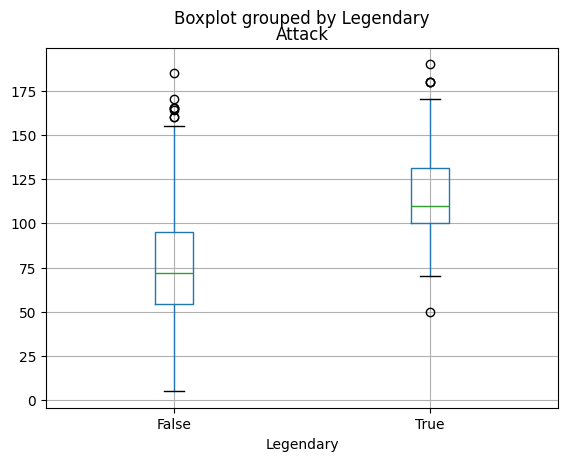

In [70]:
# For example: compare attack of pokemons that are legendary  or not

pokemon_df.boxplot(column='Attack',by = 'Legendary')

- The **black line at the top** represents the maximum value.
- The **blue line at the top** marks the 75th percentile (Q3).
- The **green line** indicates the median (50th percentile).
- The **blue line at the bottom** marks the 25th percentile (Q1).
- The **black line at the bottom** represents the minimum value.


### Tidy Data

**Tidy data** is a structured format that makes it easier to analyze and manipulate datasets. In tidy data, each variable has its own column, each observation has its own row, and each type of observational unit forms a table. This format is particularly helpful for data cleaning and transformation tasks.

#### Using `melt()` to Tidy Data

The `melt()` function in pandas is used to reshape a DataFrame from wide format to long format, making it more "tidy" by organizing columns into key-value pairs. This can make analysis and visualization tasks easier, especially when dealing with large datasets.

#### Example of `melt()`

Suppose we have a wide-format DataFrame with multiple columns representing different time periods. Using `melt()` allows us to collapse these columns into two main columns: one for the time period and another for the values.

By using `melt()`, we can convert data from a format where each column represents a variable to a tidy format where each row is an observation. This makes it simpler to work with, particularly in data analysis and visualization.

In [72]:
pokemon_df_new = pokemon_df.head()    # I only take 5 rows into new data frame
pokemon_df_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [73]:
# melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=pokemon_df_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


### Pivoting Data

**Pivoting** is the process of reshaping data from a long format back to a wide format, effectively reversing the transformation done by `melt()`. In a pivoted (wide) format, unique values from one column become separate columns, making it easy to see data organized by categories.

#### Using `pivot()` to Pivot Data

The `pivot()` function in pandas is used to convert data from a long (tidy) format to a wide format by rearranging rows and columns. This is helpful when you want to see specific values distributed across different categories.

#### Example of `pivot()`

Suppose we have a DataFrame where each row represents an observation with categories in one column and values in another. By using `pivot()`, we can make each category into a separate column, with the values organized accordingly.

Pivoting is useful for quickly summarizing and comparing data across categories, especially when viewing data trends over time or across different groups.

In [74]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')


variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


### Concatenating DATA

In [75]:
pokemon_df1 = pokemon_df.head()
pokemon_df2= pokemon_df.tail()

conc_data_row = pd.concat([pokemon_df1,pokemon_df2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [76]:
pokemon_df1 = pokemon_df['Attack'].head()
pokemon_df2= pokemon_df['Defense'].head()

conc_data_col = pd.concat([pokemon_df1,pokemon_df2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


### Data Types in Pandas

In pandas, data types define the kind of data each column can hold. Understanding and managing data types is crucial for efficient data manipulation and analysis. The five basic data types are:

1. **Object (String)**: Represents text data.
2. **Boolean**: Represents `True` or `False` values.
3. **Integer**: Represents whole numbers.
4. **Float**: Represents decimal numbers.
5. **Categorical**: Represents discrete categories, often used for variables with a fixed number of possible values.

#### Converting Data Types

Pandas allows for easy conversion between data types, such as converting a string to a categorical type or an integer to a float. This flexibility can optimize data storage and facilitate analysis.

#### Importance of Categorical Data

- **Memory Efficiency**: Converting columns with repetitive values to `category` data types can significantly reduce memory usage.
- **Enhanced Analysis**: Categorical data can be leveraged in analysis and machine learning (such as in `sklearn`), where categories help models understand data structure more effectively.

Using appropriate data types improves performance and supports more accurate analysis, making data type management an important part of data preparation.

In [77]:
pokemon_df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Let's convert object str to categorical and int to float

In [78]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')
pokemon_df['Speed'] = pokemon_df['Speed'].astype('float')
pokemon_df.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

### Handling Missing Data and Testing with `assert`

When working with datasets, it’s common to encounter **missing data**. Handling missing values effectively is essential to ensure the quality and reliability of the analysis. Here are some common strategies for dealing with missing data:

1. **Leave as Is**:
   - In some cases, it may be acceptable to leave missing data as is, especially if they are minimal or don’t affect the analysis.

2. **Drop Missing Values with `dropna()`**:
   - The `dropna()` function removes rows or columns with missing values.
   - This is useful when the missing data is significant or when it’s preferable to remove incomplete observations altogether.

3. **Fill Missing Values with `fillna()`**:
   - `fillna()` allows you to replace missing values with a specified value, such as `0`, `Unknown`, or any placeholder.
   - This approach helps retain all observations in the dataset by replacing missing values with something meaningful.

4. **Fill Missing Values with Summary Statistics**:
   - You can fill missing values using statistical measures like the **mean**, **median**, or **mode** of the column.
   - This is particularly useful for numeric data, as it preserves the dataset's size while providing a reasonable estimate for missing values.

#### Testing with `assert`

- The **`assert` statement** is a debugging tool used to check if a certain condition holds true.
- `assert` statements help test code by verifying that certain assumptions are met.
- For example, you might use `assert` to check that a column has no missing values after applying a cleaning step:
  
      assert df['column_name'].notnull().all()

- You can turn `assert` statements on or off depending on whether you are in the testing or production phase, making them a flexible testing tool for data integrity checks.

By managing missing data and using `assert` statements to verify data integrity, you can ensure a cleaner and more reliable dataset for analysis.

In [79]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [80]:
# lets check Type 2
pokemon_df["Type 2"].value_counts(dropna =False)


Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

As you can see, there are 386 NAN value, let's drop them

In [85]:
pokemon_df1 = pokemon_df 

# Lets drop nan values
pokemon_df1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
pokemon_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      800 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


## Pandas Foundation

### Review of Pandas

In this section, we reviewed foundational concepts in **pandas**. While we have covered some basics, we’ll continue to dive deeper into pandas' functionalities in future sections.

#### Key Concepts

- **Single Column = Series**: In pandas, a single column of data is represented as a `Series`. A `Series` is a one-dimensional array-like structure with labels (index).
- **`NaN` (Not a Number)**: `NaN` values indicate missing data in pandas and are commonly used as placeholders for undefined or missing entries.
- **`dataframe.values` = Numpy Array**: The `values` attribute of a DataFrame returns the underlying data as a numpy array, making it easy to perform array operations directly.

#### Building DataFrames from Scratch

- **From CSV**: We can create a DataFrame by loading data from a CSV file, as we have done previously.
- **From Dictionaries**: Another way to build a DataFrame is by using dictionaries, where keys become column names, and values are the data for each column.

#### Additional Pandas Techniques

- **`zip()` Method**: The `zip()` function combines elements from multiple sequences (like lists or tuples) into a list of tuples, where each tuple contains the corresponding elements from the input sequences.
  - **Example**: `zip([1, 2, 3], ['a', 'b', 'c'])` results in `[(1, 'a'), (2, 'b'), (3, 'c')]`.

- **Adding New Columns**: You can add new columns to an existing DataFrame by assigning values to a new column name.

- **Broadcasting**: Broadcasting allows you to assign a single value to an entire column in a DataFrame, effectively creating a new column where each row has the same value.

These basic pandas concepts are essential for data manipulation and will be expanded upon as we explore more complex operations.

In [87]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


Add new columns

In [88]:
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


Broadcasting

In [89]:
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


#### VISUAL EXPLORATORY DATA ANALYSIS

<Axes: >

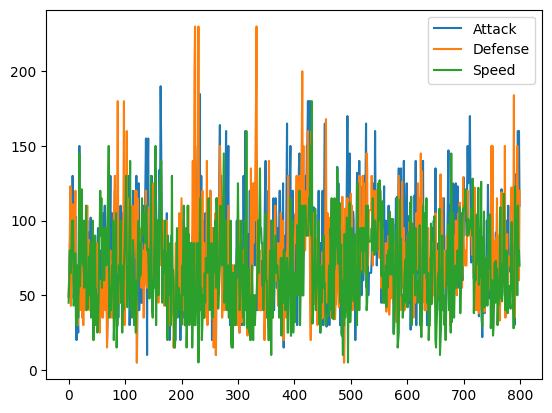

In [90]:
pokemon_df1 = pokemon_df.loc[:,["Attack","Defense","Speed"]]
pokemon_df1.plot()


Let's make subplots

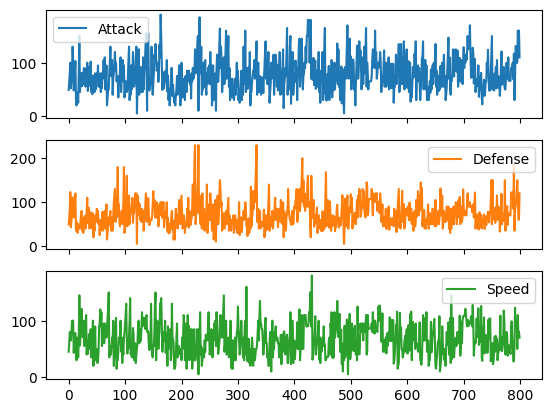

In [91]:
pokemon_df1.plot(subplots = True)
plt.show()

Scatter Plots

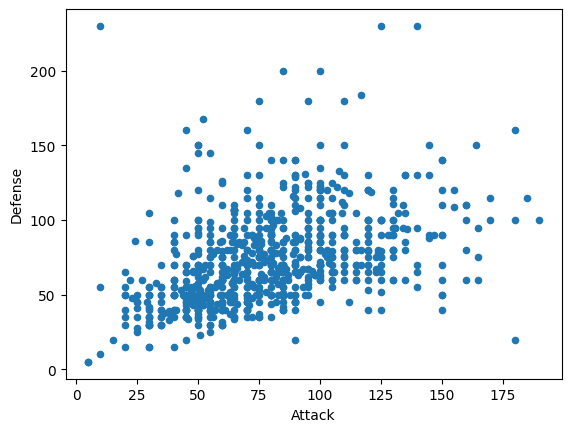

In [92]:
pokemon_df1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

Histogram

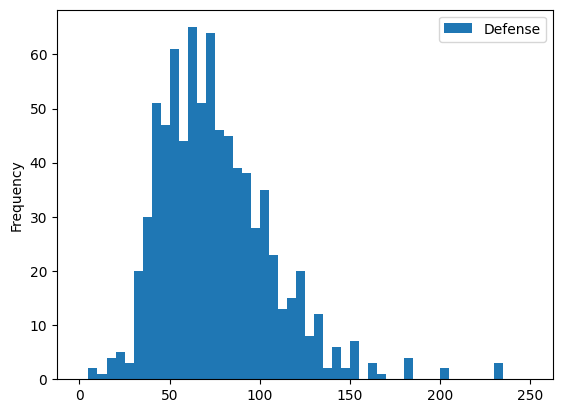

In [94]:
pokemon_df1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250))
plt.show()

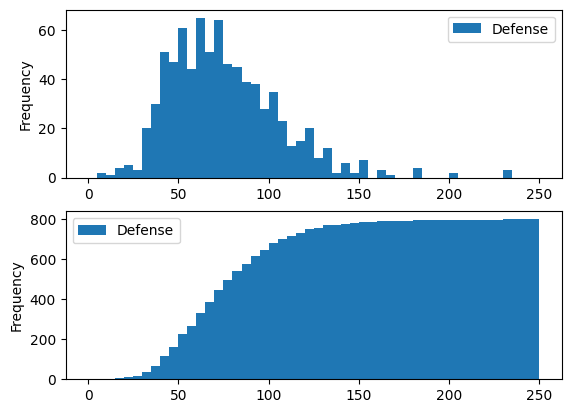

In [95]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
pokemon_df1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[0])
pokemon_df1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[1],cumulative = True)
plt.show()

### Statistical Exploratory Data Analysis

Statistical Exploratory Data Analysis (EDA) involves summarizing data with basic statistics to understand its distribution and variability. These key metrics provide insights into the central tendency, spread, and range of the data.

- **count**: Total number of data entries.
- **mean**: The average of all entries.
- **std (standard deviation)**: Measures the spread of data around the mean.
- **min**: The smallest entry in the dataset.
- **25% (first quantile)**: The value below which 25% of the data falls.
- **50% (median)**: The middle value, splitting the data into two halves.
- **75% (third quantile)**: The value below which 75% of the data falls.
- **max**: The largest entry in the dataset.

These statistics help identify patterns, detect outliers, and understand the overall data distribution, which is essential for deeper analysis.

In [96]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Indexing Pandas Time Series

In [97]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object

datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [102]:
import warnings
warnings.filterwarnings("ignore")
pokemon_df = pd.read_csv('archive/pokemon.csv')
data = pokemon_df.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data["date"] = datetime_object

# lets make date as index
data= data.set_index("date")
data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Now, we can select according to our date index

In [103]:
print(data.loc["1993-03-16"])
print(data.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


### Resampling Pandas Time Series

**Resampling** is a technique used to aggregate or disaggregate time series data over different time intervals. This process is essential in time series analysis to change the frequency of data points for easier analysis or visualization.

#### Key Concepts

- **Resampling**:
  - A method for adjusting the time frequency of data, such as converting daily data to monthly averages.
  - Requires a string parameter to specify the frequency, such as `"M"` for monthly or `"A"` for annually.

- **Downsampling**:
  - Reduces the frequency of data points by aggregating them into larger intervals.
  - Example: Converting daily data to weekly data by averaging or summing over each week.

- **Upsampling**:
  - Increases the frequency of data points by adding new rows at finer intervals.
  - Example: Converting daily data to hourly data, often filling in values through interpolation.

- **Interpolate**:
  - Interpolation fills in missing values in upsampled data according to specified methods.
  - Common methods include:
    - **Linear**: Fills missing values linearly between known data points.
    - **Time**: Interpolates based on time index.
    - **Index**: Uses the data index for interpolation.

Resampling is crucial for preparing time series data for analysis, enabling adjustments to the granularity of data based on analytical needs.

In [106]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [110]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
numeric_data

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
date,,,,,,,,
1992-01-10,1,45,49,49,65,65,45,1
1992-02-10,2,60,62,63,80,80,60,1
1992-03-10,3,80,82,83,100,100,80,1
1993-03-15,4,80,100,123,122,120,80,1
1993-03-16,5,39,52,43,60,50,65,1


In [111]:
numeric_data.resample("A").mean()
numeric_data

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
date,,,,,,,,
1992-01-10,1,45,49,49,65,65,45,1
1992-02-10,2,60,62,63,80,80,60,1
1992-03-10,3,80,82,83,100,100,80,1
1993-03-15,4,80,100,123,122,120,80,1
1993-03-16,5,39,52,43,60,50,65,1


In [112]:
# Lets resample with month
numeric_data.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
date,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# We can interpolete from first value
numeric_data.resample("M").first().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
date,,,,,,,,
1992-01-31,1.000000,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0
1992-02-29,2.000000,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0
1992-03-31,3.000000,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0
1992-04-30,3.083333,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0
1992-05-31,3.166667,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0
1992-06-30,3.250000,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0
1992-07-31,3.333333,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0
1992-08-31,3.416667,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0
1992-09-30,3.500000,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0


In [114]:
# Or we can interpolate with mean()
numeric_data.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
date,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0


## Manipulating Data Frames with Pandas

### Indexing DataFrames

- **Square Brackets (`[]`)**: Use square brackets to select specific columns or filter rows.
- **Column Attributes and Row Labels**: Access columns directly by their names and rows by their labels.
- **`loc` Accessor**: Use `loc` to select rows and columns by labels, allowing more flexibility.
- **Selecting Specific Columns**: Choose only certain columns to focus on relevant data for analysis.

In [115]:
pokemon_df = pd.read_csv('archive/pokemon.csv')
pokemon_df = pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [116]:
# indexing using square brackets
pokemon_df["HP"][1]

45

In [117]:
# using column attribute and row label
pokemon_df.HP[1]

45

In [118]:
# using loc accessor
pokemon_df.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [119]:
# selecting only some columns
pokemon_df[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


### Slicing Data Frame

In [120]:
# Difference between selecting columns: series and dataframes
print(type(pokemon_df["HP"]))     # series
print(type(pokemon_df[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [121]:
# slicing and indexing series
pokemon_df.loc[1:10, "HP":"Defense"]

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [122]:
# reverse slicing
pokemon_df.loc[10:1:-1, "HP":"Defense"]

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [123]:
# from something to end
pokemon_df.loc[1:10, "Speed":]

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


### Filtering Data Frames

In [124]:
boolean = pokemon_df.HP > 200
pokemon_df[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [125]:
# combining filters
first_filter = pokemon_df.HP > 150
second_filter = pokemon_df.Speed > 35
pokemon_df[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [126]:
# filtering column based others
pokemon_df.HP[pokemon_df.Speed<15]


#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

### Transforming Data

In [127]:
# plain python functions
def div(n):
    return n/2

pokemon_df.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [128]:
# or we can make use of lambda function
pokemon_df.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [129]:
# defiing column using other columns
pokemon_df["total_power"] = pokemon_df.Attack + pokemon_df.Defense
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


### Index Objects and Labelled Data

In [130]:
# our index name is this:
print(pokemon_df.index.name)
# lets change it
pokemon_df.index.name = "index_name"
pokemon_df.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [131]:
# overwriting index
# if we want to modify index we need to change all of them.
pokemon_df.head()
# first copy of our data to data3 then change index
pokemon_df3 = pokemon_df.copy()
# lets make index start from 100. It is not remarkable change but it is just example
pokemon_df3.index = range(100,900,1)
pokemon_df3.head()


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


### Hierarchical Indexing

In [132]:
pokemon_df = pd.read_csv('archive/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


As you can see there is index. However we want to set one or more column to be index

In [133]:
# setting index : type 1 is outer type 2 is inner index
pokemon_df1 = pokemon_df.set_index(["Type 1","Type 2"])
pokemon_df1.head(100)

#           Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                               
Grass  Poison    1      Bulbasaur   45      49       49       65       65   
       Poison    2        Ivysaur   60      62       63       80       80   
       Poison    3       Venusaur   80      82       83      100      100   
       Poison    4  Mega Venusaur   80     100      123      122      120   
Fire   NaN       5     Charmander   39      52       43       60       50   
...            ...            ...  ...     ...      ...      ...      ...   
Poison NaN      96         Grimer   80      80       50       40       50   
       NaN      97            Muk  105     105       75       65      100   
Water  NaN      98       Shellder   30      65      100       45       25   
       Ice      99       Cloyster   50      95      180       85       45   
Ghost  Poison  100         Gastly   30      35       30      100       35   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
...              ...         ...        ...  
Poison NaN        25           1      False  
       NaN        50           1      False  
Water  NaN        40           1      False  
       Ice        70           1      False  
Ghost  Poison     80           1      False  

[100 rows x 10 columns]

#### Plotting Data Frames

In [134]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [135]:
# pivoting
df.pivot(index="treatment",columns ="gender", values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


### Stacking and Unstacking DataFrames

**Stacking** and **unstacking** are operations that allow you to reshape DataFrames with multi-level (hierarchical) indexes.

- **Stacking**: Converts columns into rows, creating a multi-level index. This is useful for transforming data into a long format.
- **Unstacking**: Converts rows into columns, reversing the stacking operation and transforming the data back into a wide format.

#### Key Parameters

- **`level`**: Specifies which index level to unstack. For example, `level=0` un-stacks the outermost index.
- **`swaplevel`**: Swaps the positions of inner and outer index levels, making it easier to rearrange data in a hierarchical index.

These methods are useful for organizing and analyzing data with multi-level indexes, providing flexibility to pivot between different data structures.

In [136]:
df1 =df.set_index(["treatment","gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [137]:
# level determines indexes
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [139]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [140]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


#### Melting Dataframes

In [141]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [142]:
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


#### Categoricals and GroupBy

In [146]:
# we will use df
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [148]:
# Assuming your DataFrame is named df
# Group by 'treatment' and 'gender', then calculate the mean for numeric columns only
grouped_result = df.groupby(['treatment', 'gender']).mean()

# Display the result
print(grouped_result)

                  response   age
treatment gender                
A         F           10.0  15.0
          M           45.0   4.0
B         F            5.0  72.0
          M            9.0  65.0
